In [62]:
import os
import pandas as pd
import glob
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:


df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))

In [48]:
df

,attention,meditation,lowAlpha,lowBeta,lowGamma,highAlpha,highBeta,X,Y,Direction
0,0,0,0,0,0,0,0,224,120,No-Change
1,14,27,7940,2132,7940,1438,1438,224,120,Down-Right
2,13,11,3277,1542,3277,1048,1048,775,769,Down-Right
3,13,11,3277,1542,3277,1048,1048,1454,1355,Down-Left
4,41,29,54899,63366,54899,50589,50589,1428,1376,Down-Right
...,...,...,...,...,...,...,...,...,...,...
225,44,74,19953,6881,19953,5845,5845,956,539,Down-Right
226,37,63,35863,9212,35863,6483,6483,1058,596,Down-Right
227,24,60,7376,23585,7376,8541,8541,1159,653,Down-Right
228,27,60,114282,23838,114282,20023,20023,1255,706,Down-Right


In [49]:
df.isnull().sum()

attention     0
meditation    0
lowAlpha      0
lowBeta       0
lowGamma      0
highAlpha     0
highBeta      0
X             0
Y             0
Direction     7
dtype: int64

In [50]:
df =df.dropna(axis=0, subset=['Direction'])
df = df.dropna(axis=0, subset=['X'])
df = df.loc[(df[['attention']] != 0).all(axis=1)]

In [51]:
df

,attention,meditation,lowAlpha,lowBeta,lowGamma,highAlpha,highBeta,X,Y,Direction
1,14,27,7940,2132,7940,1438,1438,224,120,Down-Right
2,13,11,3277,1542,3277,1048,1048,775,769,Down-Right
3,13,11,3277,1542,3277,1048,1048,1454,1355,Down-Left
4,41,29,54899,63366,54899,50589,50589,1428,1376,Down-Right
5,41,29,14987,1618,14987,3294,3294,1431,1385,Up-Left
...,...,...,...,...,...,...,...,...,...,...
224,50,69,14311,5433,14311,3288,3288,855,482,Down-Right
225,44,74,19953,6881,19953,5845,5845,956,539,Down-Right
226,37,63,35863,9212,35863,6483,6483,1058,596,Down-Right
227,24,60,7376,23585,7376,8541,8541,1159,653,Down-Right


In [52]:
#label_encoder = preprocessing.LabelEncoder()
#df['Direction']= label_encoder.fit_transform(df['Direction'])

df['Direction'] = df['Direction'].map({'No-Change' : 0, 'Up' : 1, 'Up-Right' : 2, 'Right' : 3, 'Down-Right' : 4, 'Down' : 5, 'Down-Left' : 6, 'Left' : 7, 'Up-Left' : 8})
df['Direction'].unique()


array([4, 6, 8, 2, 0, 1, 5, 3, 7], dtype=int64)

In [53]:
df

,attention,meditation,lowAlpha,lowBeta,lowGamma,highAlpha,highBeta,X,Y,Direction
1,14,27,7940,2132,7940,1438,1438,224,120,4
2,13,11,3277,1542,3277,1048,1048,775,769,4
3,13,11,3277,1542,3277,1048,1048,1454,1355,6
4,41,29,54899,63366,54899,50589,50589,1428,1376,4
5,41,29,14987,1618,14987,3294,3294,1431,1385,8
...,...,...,...,...,...,...,...,...,...,...
224,50,69,14311,5433,14311,3288,3288,855,482,4
225,44,74,19953,6881,19953,5845,5845,956,539,4
226,37,63,35863,9212,35863,6483,6483,1058,596,4
227,24,60,7376,23585,7376,8541,8541,1159,653,4


In [54]:
df =df.drop(['X', 'Y'], axis=1)

In [55]:
columns = ['lowAlpha', 'lowBeta', 'lowGamma', 'highAlpha', 'highBeta']

min_max = preprocessing.MinMaxScaler()
df[columns] = min_max.fit_transform(df[columns])

In [56]:
df

,attention,meditation,lowAlpha,lowBeta,lowGamma,highAlpha,highBeta,Direction
1,14,27,0.013744,0.001701,0.013744,0.001577,0.001577,4
2,13,11,0.005571,0.001152,0.005571,0.001097,0.001097,4
3,13,11,0.005571,0.001152,0.005571,0.001097,0.001097,6
4,41,29,0.096044,0.058646,0.096044,0.062093,0.062093,4
5,41,29,0.026094,0.001223,0.026094,0.003862,0.003862,8
...,...,...,...,...,...,...,...,...
224,50,69,0.024910,0.004771,0.024910,0.003855,0.003855,4
225,44,74,0.034798,0.006117,0.034798,0.007003,0.007003,4
226,37,63,0.062681,0.008285,0.062681,0.007789,0.007789,4
227,24,60,0.012755,0.021651,0.012755,0.010323,0.010323,4


              precision    recall  f1-score   support

           0       0.69      0.39      0.50        23
           1       0.55      0.31      0.40        67
           2       0.40      0.31      0.35        54
           3       0.29      0.24      0.27        45
           4       0.21      0.23      0.22        39
           5       0.11      0.24      0.15        17
           6       0.32      0.37      0.34        35
           7       0.21      0.38      0.27        21
           8       0.48      0.62      0.54        32

    accuracy                           0.34       333
   macro avg       0.36      0.35      0.34       333
weighted avg       0.39      0.34      0.35       333



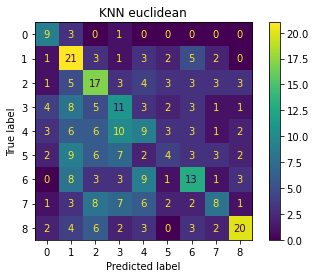

In [57]:
x=df.drop(['Direction'], axis=1)
y=df['Direction']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 ,stratify=y)
#x_train, x_test, y_train, y_test = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
model=KNeighborsClassifier(n_neighbors=3)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)
print(classification_report(y_pred, y_test))
plt.title("KNN euclidean")
plt.show()


In [58]:

df.Direction.value_counts()

4    212
8    209
2    209
6    206
5    192
7    191
3    191
1    189
0     65
Name: Direction, dtype: int64

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.68      0.54      0.60        48
           2       0.67      0.61      0.64        46
           3       0.55      0.50      0.53        42
           4       0.42      0.47      0.44        38
           5       0.39      0.47      0.43        32
           6       0.63      0.59      0.61        44
           7       0.42      0.50      0.46        32
           8       0.57      0.59      0.58        41

    accuracy                           0.55       333
   macro avg       0.57      0.59      0.57       333
weighted avg       0.56      0.55      0.56       333



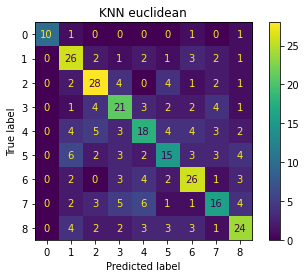

In [59]:
model1=KNeighborsClassifier(n_neighbors=1)

model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
plot_confusion_matrix(model1, x_test, y_test)
print(classification_report(y_pred1, y_test))
plt.title("KNN euclidean")
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.61      0.51      0.55        45
           2       0.62      0.59      0.60        44
           3       0.55      0.58      0.57        36
           4       0.44      0.50      0.47        38
           5       0.45      0.45      0.45        38
           6       0.51      0.50      0.51        42
           7       0.39      0.48      0.43        31
           8       0.52      0.51      0.52        43

    accuracy                           0.52       333
   macro avg       0.53      0.52      0.52       333
weighted avg       0.53      0.52      0.52       333



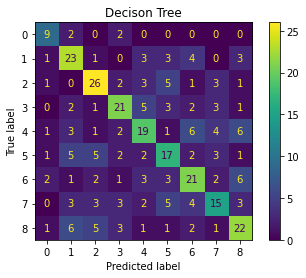

In [60]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_pred, y_test))
plot_confusion_matrix(dt, x_test, y_test)
plt.title("Decison Tree")
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.61      0.51      0.55        45
           2       0.62      0.59      0.60        44
           3       0.55      0.58      0.57        36
           4       0.44      0.50      0.47        38
           5       0.45      0.45      0.45        38
           6       0.51      0.50      0.51        42
           7       0.39      0.48      0.43        31
           8       0.52      0.51      0.52        43

    accuracy                           0.52       333
   macro avg       0.53      0.52      0.52       333
weighted avg       0.53      0.52      0.52       333



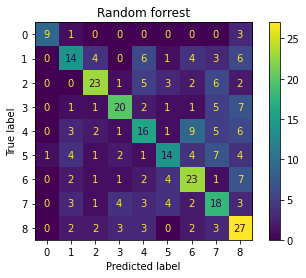

In [63]:
rf = RandomForestClassifier(max_depth=10, random_state=42)

rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

print(classification_report(y_pred, y_test))

plot_confusion_matrix(rf, x_test, y_test)
plt.title("Random forrest")
plt.show()